In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#importing datasets
train = pd.read_csv(r'D:\Internship\walmart\train.csv')
test = pd.read_csv(r'D:\Internship\walmart\test.csv')
features = pd.read_csv(r'D:\Internship\walmart\features.csv')
stores = pd.read_csv(r'D:\Internship\walmart\stores.csv')

In [3]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [4]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [5]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [6]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

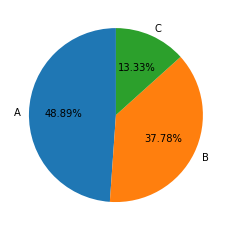

In [7]:
# Pie-Chart showing percentage of store types
labels = 'A','B','C'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.show()

In [8]:
#Converting categorical values to numeric values 
mapping_store_type = {'Type': {'A':1, 'B':2, 'C':3}}
stores.replace(mapping_store_type, inplace = True)

In [9]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [10]:
#Creating dummy variables
dummy_var = pd.get_dummies(stores.Type)
stores = pd.concat([stores, dummy_var], axis=1)

In [11]:
stores.head()

,Store,Type,Size,1,2,3
0,1,1,151315,1,0,0
1,2,1,202307,1,0,0
2,3,2,37392,0,1,0
3,4,1,205863,1,0,0
4,5,2,34875,0,1,0


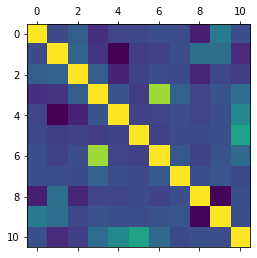

In [12]:
#Correalation plot
corr = features.corr()
plt.matshow(corr)
plt.show()

In [13]:
#Evaluating missing values
from statistics import mean
features['CPI'] = features['CPI'].transform(lambda x:x.fillna(x.mean()))
features['Unemployment'] = features['Unemployment'].transform(lambda x:x.fillna(x.mean()))
features = features.fillna(0)

In [14]:
# features.head()

In [15]:
#Merging datasets
train_stores = pd.merge(train, stores, how='left')
train_final_data = pd.merge(train_stores, features, how='left')
test_stores = pd.merge(test, stores, how='left')
test_final_data = pd.merge(test_stores, features, how='left')

In [16]:
#Changing IsHoliday categorical variable to numeric
train_final_data['IsHoliday'] = [int(i) for i in train_final_data['IsHoliday']]
test_final_data['IsHoliday'] = [int(i) for i in test_final_data['IsHoliday']]

In [17]:
#sorting final datasets
train_final_data = train_final_data.sort_values(by = 'Date')
test_final_data = test_final_data.sort_values(by = 'Date')

In [18]:
train_final_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,1,2,3,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,1,151315,1,0,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
277665,29,5,2010-02-05,15552.08,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
277808,29,6,2010-02-05,3200.22,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
277951,29,7,2010-02-05,10820.05,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
278094,29,8,2010-02-05,20055.64,0,2,93638,0,1,0,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064


In [19]:
test_final_data.head()

,Store,Dept,Date,IsHoliday,Type,Size,1,2,3,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,0,1,151315,1,0,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
48640,19,10,2012-11-02,0,1,203819,1,0,0,46.81,3.970,11686.96,18053.48,88.94,5484.50,3833.76,138.622710,7.992
42002,16,55,2012-11-02,0,2,57197,0,1,0,38.20,3.604,2826.02,984.41,4.46,274.18,1411.99,199.290867,5.847
57105,22,18,2012-11-02,0,2,119557,0,1,0,54.55,3.817,8793.36,10347.53,5.62,7350.89,801.32,142.661460,7.543
65138,25,16,2012-11-02,0,2,128107,0,1,0,40.83,3.787,12435.08,16493.02,55.19,1165.36,1144.39,216.156711,7.293


In [20]:
train_final_data.shape

(421570, 19)

In [21]:
test_final_data.shape

(115064, 18)

C:\Users\Jagajit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Jagajit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Jagajit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Jagajit\Anaconda3\lib\site-packages\pandas\plottin

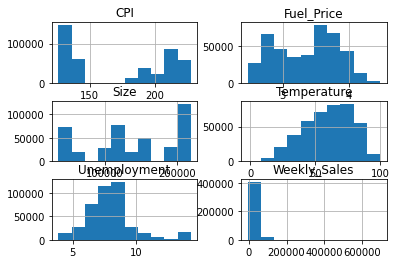

In [22]:
#Plotting data
viz = train_final_data[['Temperature', 'Fuel_Price', 'CPI', 'Weekly_Sales', 'Unemployment','Size']]
viz.hist()
plt.show()

In [23]:
'''from sklearn import *
sns.boxplot(x='Type', y='Weekly_Sales', data = train_final_data)'''

"from sklearn import *\nsns.boxplot(x='Type', y='Weekly_Sales', data = train_final_data)"

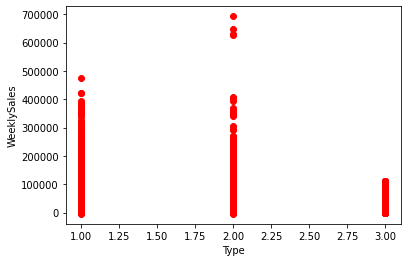

In [24]:
plt.scatter(train_final_data.Type, train_final_data.Weekly_Sales, color='red')
plt.ylabel('WeeklySales')
plt.xlabel('Type')
plt.show()

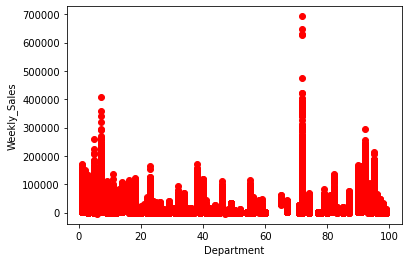

In [25]:
plt.scatter(train_final_data.Dept, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Department')
plt.ylabel('Weekly_Sales')
plt.show()

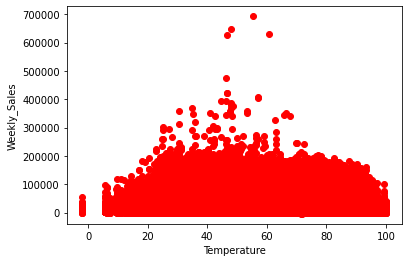

In [26]:
plt.scatter(train_final_data.Temperature, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

In [27]:
'''plt.scatter(train_final_data.Unemployment, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.show()'''

"plt.scatter(train_final_data.Unemployment, train_final_data.Weekly_Sales, color='red')\nplt.xlabel('Unemployment')\nplt.ylabel('Weekly_Sales')\nplt.show()"

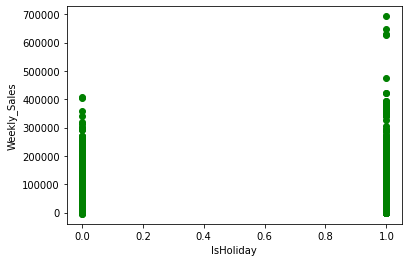

In [28]:
plt.scatter(train_final_data.IsHoliday, train_final_data.Weekly_Sales, color='green')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly_Sales')
plt.show()

In [29]:
'''plt.scatter(train_final_data.CPI, train_final_data.Weekly_Sales, color='blue')
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.show()'''

"plt.scatter(train_final_data.CPI, train_final_data.Weekly_Sales, color='blue')\nplt.xlabel('CPI')\nplt.ylabel('Weekly_Sales')\nplt.show()"

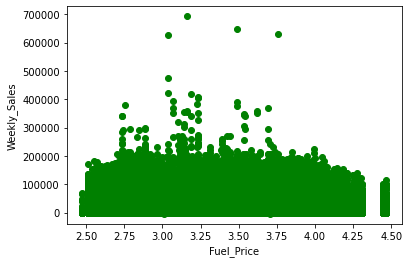

In [30]:
plt.scatter(train_final_data.Fuel_Price, train_final_data.Weekly_Sales, color='green')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.show()

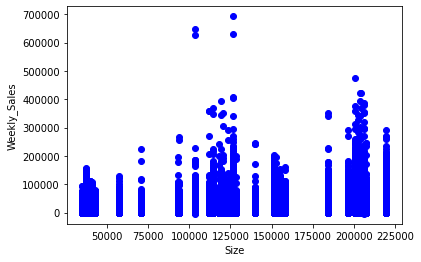

In [31]:
plt.scatter(train_final_data.Size, train_final_data.Weekly_Sales, color='blue')
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.show()

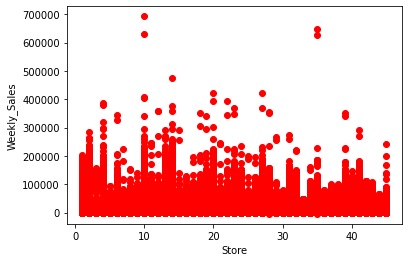

In [32]:
plt.scatter(train_final_data.Store, train_final_data.Weekly_Sales, color='red')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.show()

In [33]:
'''plt.hist(train_final_data['Type'])
plt.show()'''

"plt.hist(train_final_data['Type'])\nplt.show()"

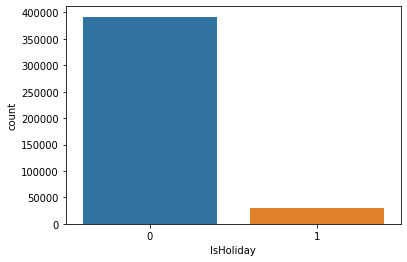

In [34]:
sns.countplot(x='IsHoliday', data=train_final_data)

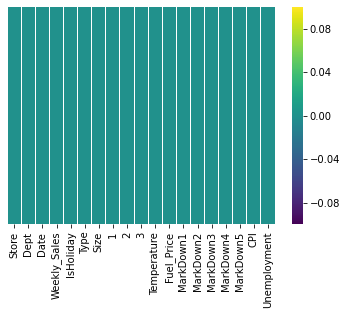

In [35]:
sns.heatmap(train_final_data.isnull(),yticklabels=False, cmap="viridis")

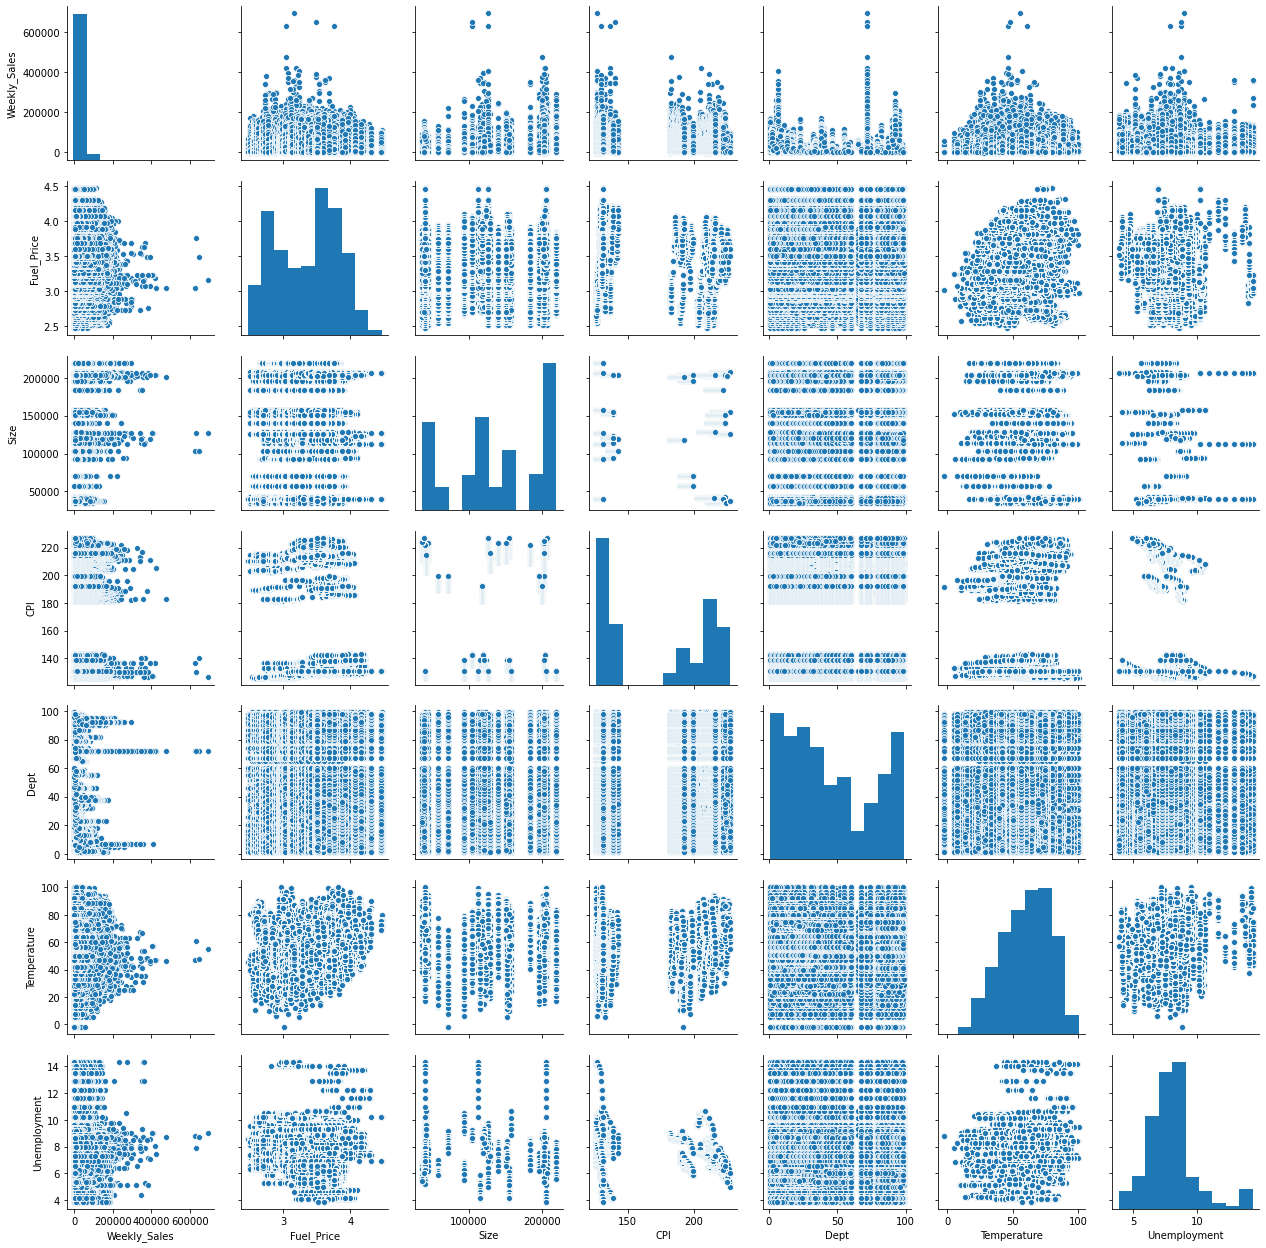

In [36]:
sns.pairplot(train_final_data, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [37]:
# sns.pairplot(train_final_data, vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [38]:
'''plt.scatter(train_final_data.IsHoliday, train_final_data.Weekly_Sales, color='green')
plt.xlabel('Holiday')
plt.ylabel('Weekly_Sales')
plt.show()'''

"plt.scatter(train_final_data.IsHoliday, train_final_data.Weekly_Sales, color='green')\nplt.xlabel('Holiday')\nplt.ylabel('Weekly_Sales')\nplt.show()"

In [39]:
#dropping unwanted columns
train_final_data = train_final_data.drop(columns='Type')
test_final_data = test_final_data.drop(columns='Type')
train_final_data = train_final_data[train_final_data['Weekly_Sales']>=0]

In [40]:
# Adding extra features
train_final_data.Date = pd.to_datetime(train_final_data.Date)
test_final_data.Date = pd.to_datetime(test_final_data.Date)
# Add column for year
train_final_data["Year"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.year
test_final_data["Year"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.year
# Add column for day
train_final_data["Day"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.day
test_final_data["Day"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.day
# Add column for week
train_final_data["Week"] = pd.to_datetime(train_final_data["Date"], format="%Y-%m-%d").dt.week
test_final_data["Week"] = pd.to_datetime(test_final_data["Date"], format="%Y-%m-%d").dt.week

In [41]:
train_final_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,1,2,3,Temperature,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day,Week
0,1,1,2010-02-05,24924.50,0,151315,1,0,0,42.31,...,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,5,5
277665,29,5,2010-02-05,15552.08,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5
277808,29,6,2010-02-05,3200.22,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5
277951,29,7,2010-02-05,10820.05,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5
278094,29,8,2010-02-05,20055.64,0,93638,0,1,0,24.36,...,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,5,5


In [42]:
# train_final_data.describe()

In [43]:
train_final_data.shape

(420285, 21)

In [44]:
test_final_data.head()

,Store,Dept,Date,IsHoliday,Size,1,2,3,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Day,Week
0,1,1,2012-11-02,0,151315,1,0,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,2012,2,44
48640,19,10,2012-11-02,0,203819,1,0,0,46.81,3.970,11686.96,18053.48,88.94,5484.50,3833.76,138.622710,7.992,2012,2,44
42002,16,55,2012-11-02,0,57197,0,1,0,38.20,3.604,2826.02,984.41,4.46,274.18,1411.99,199.290867,5.847,2012,2,44
57105,22,18,2012-11-02,0,119557,0,1,0,54.55,3.817,8793.36,10347.53,5.62,7350.89,801.32,142.661460,7.543,2012,2,44
65138,25,16,2012-11-02,0,128107,0,1,0,40.83,3.787,12435.08,16493.02,55.19,1165.36,1144.39,216.156711,7.293,2012,2,44


In [45]:
test_final_data.shape

(115064, 20)

In [46]:
features['IsHoliday'] = [int(i) for i in features['IsHoliday']]

In [47]:
#splitting data 
train_X = train_final_data.drop(['Weekly_Sales', 'Date', 'CPI', 'Unemployment', 'MarkDown5','MarkDown3','MarkDown4','MarkDown2', 3], axis = 1)
test_X = test_final_data.drop(['Date', 'CPI', 'Unemployment', 'MarkDown5','MarkDown3','MarkDown4','MarkDown2', 3], axis = 1)
train_y = train_final_data['Weekly_Sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 50)

In [48]:
train_X.shape, test_X.shape, train_y.shape

((420285, 12), (115064, 12), (420285,))

In [49]:
from sklearn.linear_model import LinearRegression
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred = multi_reg.predict(X_test)

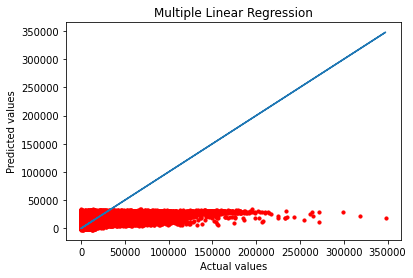

In [50]:
plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred, s=10, c="red")
plt.title("Multiple Linear Regression")
plt.xlabel("Actual values") #blue line
plt.ylabel("Predicted values") #red dots
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', multi_reg.score(X_test, y_test)*100)

Mean Absolute error: 14492.918682795196
Mean Squared error: 455255306.85450023
Root Mean Squared error: 21336.712653417355
Accuracy: 8.947380125671478


In [52]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 17, n_jobs = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [53]:
print('Mean Absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', knn.score(X_test, y_test)*100)

Mean Absolute error: 11424.556290941233
Mean Squared error: 335120543.86122525
Root Mean Squared error: 18306.29792888844
Accuracy: 32.97474398903264


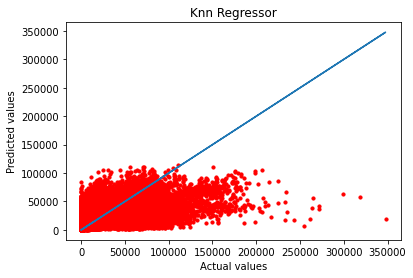

In [54]:
plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred, s=10, c="red")
plt.title("Knn Regressor")
plt.xlabel("Actual values") #blue line
plt.ylabel("Predicted values") #red dots
plt.show()

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 10)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

In [56]:
print('Mean Absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', dt_reg.score(X_test, y_test)*100)

Mean Absolute error: 1745.2978722771452
Mean Squared error: 17785589.27914612
Root Mean Squared error: 4217.296441933638
Accuracy: 96.44282125767158


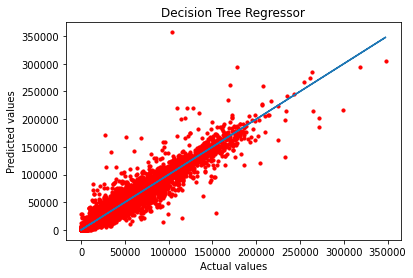

In [57]:
plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred, s=10, c="red")
plt.title("Decision Tree Regressor")
plt.xlabel("Actual values") #blue line
plt.ylabel("Predicted values") #red dots
plt.show()

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 10)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

In [59]:
print('Mean Absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', rf_reg.score(X_test, y_test)*100)

Mean Absolute error: 1392.6831936424092
Mean Squared error: 10635606.667038336
Root Mean Squared error: 3261.227785211934
Accuracy: 97.87284225706739


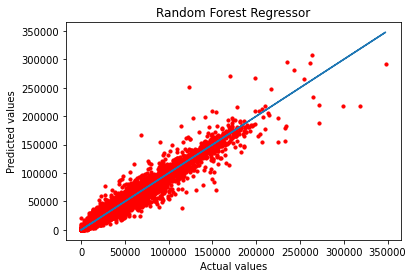

In [60]:
plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred, s=10, c="red")
plt.title("Random Forest Regressor")
plt.xlabel("Actual values") #blue line
plt.ylabel("Predicted values") #red dots
plt.show()

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 20, learning_rate = 1)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [62]:
print('Mean Absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared error:', math.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy:', gbr.score(X_test, y_test)*100)

Mean Absolute error: 6474.068302889549
Mean Squared error: 107500171.63001132
Root Mean Squared error: 10368.22895339466
Accuracy: 78.49959766206351


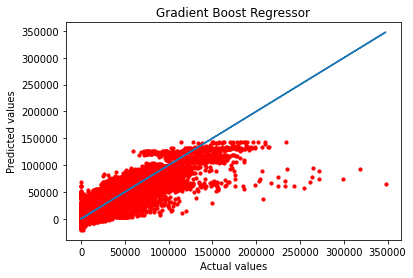

In [63]:
plt.figure()
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred, s=10, c="red")
plt.title("Gradient Boost Regressor")
plt.xlabel("Actual values") #blue line
plt.ylabel("Predicted values") #red dots
plt.show()

In [64]:
# Using Random Forest(Low RMSE and high accuracy) to predict values for unknown dataset(test dataset)
predicted_values_of_test_set = rf_reg.predict(test_X)

In [65]:
# Saving it in a csv file
temp_frame = pd.DataFrame(predicted_values_of_test_set)
temp_frame.to_csv('Predicted_values_using_RF.csv')

Variable: Dept                 Importance: 0.63
Variable: Weekly_Sales         Importance: 0.2
Variable: Store                Importance: 0.07
Variable: MarkDown1            Importance: 0.05
Variable: Size                 Importance: 0.01
Variable:                    1 Importance: 0.01
Variable:                    2 Importance: 0.01
Variable: Fuel_Price           Importance: 0.01
Variable: Date                 Importance: 0.0
Variable: IsHoliday            Importance: 0.0
Variable:                    3 Importance: 0.0
Variable: Temperature          Importance: 0.0


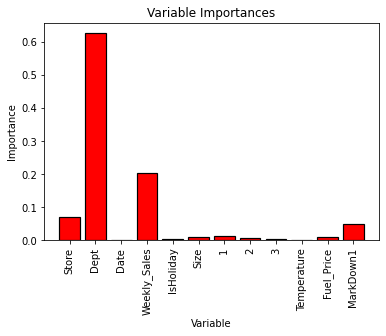

In [66]:
# Get numerical feature importances
feature_list = list(train_final_data.columns)
importances = list(rf_reg.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
# list of x locations for plotting
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');